# Statistics basics
## Final project
Good news! You are hired by some retail company to analyse transaction statistics in a retail chain. (Sorry, this is just an imaginary company so far, but if you successfully finish our program, I'm sure it will become reality.)

You have to use everything that we learned so far to answer questions that are asked by your employer.

Part of the questions require that you write some code that will be automatically tested with autograding. So when you are finished, please, send this work to automatic grading.

The other part of questions are presented in the appropriate quiz. Answer them using your results.

Finally, some problems will be assessed manually. So, please, submit your notebook to staff graded assignment as well.

Note you are not allowed to use loops anywhere in this project!

Let's begin!

### Data

There are three datasets: `customers.csv`, `purchases.csv` and `shops.csv`. They are stored in `data` folder.

`customers.csv` contains information about each customer registered in loyalty program.

`shops.csv` contains information about shops and special offers they organized. One shap can organize several offers and therefore there are usually several rows that correspond to the same shops. However, some shops do not organize special offers at all, but they are presented in this table nevertheless.

`purchases.csv` is a purchase log. It contains information for all customers, either registered in a loyalty program (in this case we know the corresponding customer id) or not registered. One purchase can be a collection of several items, but we see only the total price of everything bought.

In [1]:
!ls data/

customers.csv  purchases.csv  shops.csv


First, let us load these datasets and make a quick glance on them.

### Problem 1 (autograded)
Load datasets intro variables `customers`, `purchases` and `shops`. Use `pd.read_csv`.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
# your code here

customers = pd.read_csv('data/customers.csv')
purchases = pd.read_csv('data/purchases.csv')
shops = pd.read_csv('data/shops.csv')


In [4]:
customers[:3]

,customer id,age
0,1149,71.0
1,750,21.0
2,428,36.0


In [5]:
purchases[:3]

,customer_id,date,shop_id,total_price
0,0.0,2018-05-04,40,289.673291
1,0.0,2019-01-26,40,1316.898901
2,0.0,2018-11-18,42,159.414367


In [6]:
shops[:3]

,shop_id,offer_begin,offer_end
0,0,2019-02-28,2019-03-13
1,0,2018-07-22,2018-08-10
2,0,2018-09-21,2018-09-27


In [7]:
from hashlib import md5
import numpy as np


def test_df(frame, digest):
    obtained = md5(
        "".join(
            [str(x) for x in np.c_[frame.head().values, frame.tail().values]]
        ).encode("utf8")
    ).hexdigest()
    assert obtained == digest, "Something wrong with files: " + obtained


test_df(customers, "a8c3a3d5d5f93d721f7f98564228a484")
test_df(purchases, "1d4ffa7e30dcd29ab1d47d3731967a49")
test_df(shops, "e017f3f83ad39610a7d82a54480fb98f")
print("Great, everything loaded successfully!")

Great, everything loaded successfully!


### Problem 2 (quiz)

Investigate dataframes and answer the following questions (in the appropriate Quiz):

1. What is the type of variable `customer_id` in the dataset `purchases`?
2. What is the type of variable `age` in the dataset `customers`?

Note that you have to provide your answers based on the meaning of the data, not on the Python object types of the corresponding column.

In [8]:
purchases[:5]

,customer_id,date,shop_id,total_price
0,0.0,2018-05-04,40,289.673291
1,0.0,2019-01-26,40,1316.898901
2,0.0,2018-11-18,42,159.414367
3,0.0,2018-05-12,42,808.791649
4,0.0,2019-04-20,42,1207.855038


In [9]:
purchases.dtypes

customer_id    float64
date            object
shop_id          int64
total_price    float64
dtype: object

#### 1. Answer:
Variable `customer_id` has a float64 Python format, but the data type can be classified as ***Categorical type***, because `customer_id` does not carry numerical information (clients cannot be compared by `customer_id` with each other (with some exceptions that do not apply to this task)).


In [10]:
customers[:5]

,customer id,age
0,1149,71.0
1,750,21.0
2,428,36.0
3,360,38.0
4,816,51.0


In [11]:
customers.dtypes

customer id      int64
age            float64
dtype: object

#### 2. Answer:
Variable `age` can be classified as ***Numeric type***, because `age` has a numerical meaning (clients can be compared by `age` with each other, culculate mean, variance etc.)

### Problem 3 (SGA)
Let us consider column `total_price` in the dataset `purchases`. May we assume that this column is an i.i.d. sample from some random variable? Write your answer and full explanation in the cell below.


In [13]:
purchases[:5]

,customer_id,date,shop_id,total_price
0,0.0,2018-05-04,40,289.673291
1,0.0,2019-01-26,40,1316.898901
2,0.0,2018-11-18,42,159.414367
3,0.0,2018-05-12,42,808.791649
4,0.0,2019-04-20,42,1207.855038


*Write your answer here*

No, the `total_price` cannot be considered i.i.d., because this random variable can contain several purchases by the same customer, which can be dependent on each other. This means that the `total_price` is not be i.i.d. random variable.  

I presented the mathematical proof of this statement in the SGA of the week-1 through the properties of the probabilities product of independent random variables and the joint pdf of these random variables (in the case of not i.i.d., these probabilities are not equal).  

Let's try to prove this statement experimentally using our data.

#### Part 1.
1. Let's split our sample into 2 random non-overlapping subsamples:

In [237]:
from sklearn.model_selection import train_test_split

subsample1, subsample2 = train_test_split(purchases, test_size=0.5)

In [243]:
subsample1.shape

(20201, 7)

In [244]:
subsample2.shape

(20201, 7)

2. Let's now calculate the average purchase price for each customer in both subsamples.

In [245]:
mean_price_per_customer_sample1 = subsample1[['customer_id', 'total_price']].groupby(['customer_id']).mean()
mean_price_per_customer_sample2 = subsample2[['customer_id', 'total_price']].groupby(['customer_id']).mean()

In [246]:
mean_price_per_customer_sample1[:3]

,total_price
customer_id,
0.0,696.540703
2.0,409.475447
3.0,364.274730


In [247]:
mean_price_per_customer_sample2[:3]

,total_price
customer_id,
0.0,726.042238
2.0,347.206380
3.0,414.658375


3. Let's draw a scatterplot for the two resulting subsamples

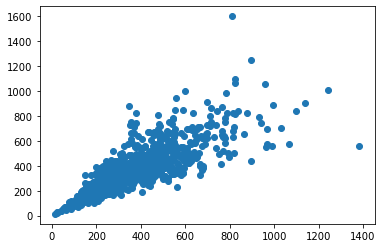

In [248]:
plt.scatter(x=mean_price_per_customer_sample1['total_price'],
            y=mean_price_per_customer_sample2['total_price']);

We see a strong positive correlation in the average purchase price across the two samples.

4. Let's calculate the value of Pearson's correlation between the purchases mean price of two subsamples:

In [249]:
corr_pearson = np.corrcoef(purchases_mean_customer_sample1['total_price'],
                           purchases_mean_customer_sample2['total_price'])

print('corr_pearson:', round(corr_pearson[0][1],4))

corr_pearson: 0.7747


We see a high value of Pearson's correlation.

4. Let's test the two-sided null hypothesis that this Pearson correlation is no different from a zero correlation with a 5% significance level. Accordingly, an alternative hypothesis would mean that our results differ from zero correlation with a given level of significance.

In [251]:
import scipy.stats

correlation_1, p_value_correlation_1 = scipy.stats.pearsonr(purchases_mean_customer_sample1['total_price'],
                                                            purchases_mean_customer_sample2['total_price'])
print("Pearson's correlation =", correlation_1)
print("p_value_correlation =", p_value_correlation_1)
print('(p_value_corr < 0.05) is', p_value_correlation_1 < 0.05)

Pearson's correlation = 0.7746880440075378
p_value_correlation = 2.3350949207718066e-174
(p_value_corr < 0.05) is True


We see that the null hypothesis is rejected (p_value> 0.05), which means that the purchases price for one customer are dependent values and that the "total_price" column isn't  i.i.d. sample from some random variable.

#### Part 2.
1. Let's now first calculate the mean purchase price for each customer, and then divide the resulting sample into 2 random non-overlapping subsamples by `customer_id`:

In [252]:
mean_price_per_customer_sample = purchases[['customer_id', 'total_price']].groupby(['customer_id']).mean()

In [253]:
mean_price_per_customer_sample[:3]

,total_price
customer_id,
0.0,711.291471
2.0,380.286822
3.0,392.825462


In [254]:
mean_price_per_customer_sample.reset_index(inplace=True)

In [255]:
subsample_1, subsample_2 = train_test_split(mean_price_per_customer_sample, test_size=0.5)

In [256]:
subsample_1.shape

(433, 2)

In [257]:
subsample_2.shape

(434, 2)

2. Let's draw a scatterplot for the two resulting subsamples (let's take the first 433 customers from each subsample so that the array lengths are the same):

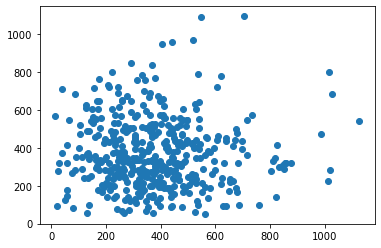

In [258]:
plt.scatter(x=subsample_1['total_price'][:433],
            y=subsample_2['total_price'][:433]);

3. Let's calculate the value of Pearson's correlation between the purchases mean price of two subsamples:

In [261]:
corr_pearson_p2 = np.corrcoef(subsample_1['total_price'][:433],
                              subsample_2['total_price'][:433])

print('corr_pearson:', round(corr_pearson_p2[0][1],6))

corr_pearson: -0.002617


We see very low correlation.

4. Let's test the two-sided null hypothesis that this Pearson correlation is no different from a zero correlation with a 5% significance level. Accordingly, an alternative hypothesis would mean that our results differ from zero correlation with a given level of significance.

In [262]:
correlation_2, p_value_correlation_2 = scipy.stats.pearsonr(subsample_1['total_price'][:433],
                                                            subsample_2['total_price'][:433])
print("Pearson's correlation =", correlation_2)
print("p_value_correlation =", p_value_correlation_2)
print('(p_value_corr < 0.05) is', p_value_correlation_2 < 0.05)

Pearson's correlation = -0.002616749912073579
p_value_correlation = 0.9567011441931106
(p_value_corr < 0.05) is False


We see that the null hypothesis is not rejected (p_value> 0.05), which means that after `customer_id` aggregation, the "average_price_per_customer" field can be considered as i.i.d. random variable.


**P.S.**
This is a very common problem in practical applications where customer data is present, such as payment transactions, purchases, medical exam metrics, etc. And it is very important to split the sample by `person_id` so that all data for one person is included in only one subsample.  
In some scientific papers we can see, that researchers make this mistakes and don't take into account this effect, getting overfitted models with a quality of about 100%.

### Problem 4 (quiz)
Visualise distribution of variable `age` in the dataset `customers` using appropriate visualization tool.


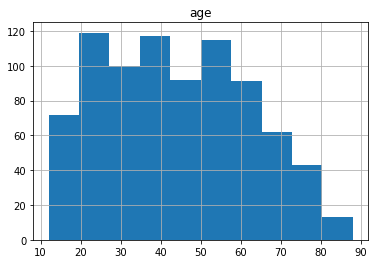

In [263]:
# your code here
customers.hist('age');

### Problem 5 (quiz)
Your employer is going to provide two special offers for all registered customers based on the customer age. They want to pick some threshold age, and offer one special program to customers who are younger than this threshold age and another special program to customers who are older than this age. They want to choose the threshold in such a way that the number of potential participants of both programs coincide (or at least be as close to each other as possible). What is the threshold?

In [264]:
# your code here

# calculate the median of the array, ignoring unregistered users (NaN values in 'age')
np.nanmedian(customers['age'])

43.0

### Problem 6 (quiz)

Let us visualize how purchases are distributed around a year. For example, it is known that December is a hot month for retail due to Christmas. Will you see it in the data? Are there any other tendencies we will see?

To do it, we have to extract a month from the `date` variable of `purchases` table and create a new variable (new dataframe column) that contains this month, then plot distribution of this variable. There is a special data type in pandas to represent date and time. However, by default `pd.read_csv` does not try to guess that a particular column contains something that looks like a date and reads it just as a column of strings. So let's convert this column manually using function `pd.to_datetime` first:


In [265]:
purchases["date"] = pd.to_datetime(purchases["date"])

Let's check that `date` has correct `dtype`:

In [266]:
purchases["date"].dtype

dtype('<M8[ns]')

This should return something like `dtype('datetime64[ns]')` or `dtype('<M8[ns]')`. It is much easier to work with dates when they are converted to native datetime format instead of strings. For example, you can find the difference between two dates and do a lot of other things. To extract different features of date like month of even day of week, one can use `.dt` accessor (similar to using `.str` accessor to access string methods), see [documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#time-date-components) for details. For example, this is how we can extract day of week (Monday=0, Sunday=6):

In [267]:
purchases["date"].dt.dayofweek

0        4
1        5
2        6
3        5
4        5
        ..
40397    5
40398    5
40399    2
40400    5
40401    5
Name: date, Length: 40402, dtype: int64

Now let us return to our problem here. We want to make a plot that shows how many purchases we have per month. In other words, we want to create and consider new variable `month`. This is a categorical variable. Use an appropriate tool to visualize it.

Make this bar plot. 

**Hint.** To sort the values on the horizontal axis one can use `.sort_index()`.


In [268]:
purchases[:5]

,customer_id,date,shop_id,total_price,month,year,year_month
0,0.0,2018-05-04,40,289.673291,5,2018,201805
1,0.0,2019-01-26,40,1316.898901,1,2019,201901
2,0.0,2018-11-18,42,159.414367,11,2018,201811
3,0.0,2018-05-12,42,808.791649,5,2018,201805
4,0.0,2019-04-20,42,1207.855038,4,2019,201904


In [269]:
purchases.dtypes

customer_id           float64
date           datetime64[ns]
shop_id                 int64
total_price           float64
month                   int64
year                    int64
year_month             object
dtype: object

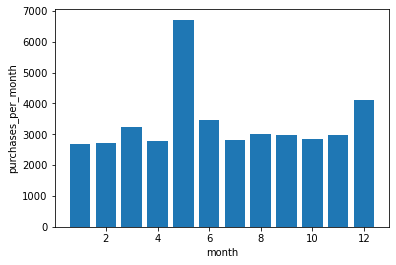

In [270]:
# your code here

purchases['month'] = purchases['date'].dt.month
purchases_per_month = purchases[['month', 'total_price']].groupby(['month']).count()
purchases_per_month.sort_index()
x = purchases_per_month.index.to_list()
y = purchases_per_month.total_price

fig, ax = plt.subplots()
ax.bar(x, y)
ax.set_xlabel('month')
ax.set_ylabel('purchases_per_month')
plt.show()

### Problem 7 (SGA)

What's wrong with May? Why do we have so many purchases? Are there any unknown holidays in this month? Or it's some other reason? Investigate your data and give an answer. Write it in the cell below. Add new cells to include code / explanations as necessary.

Let's see the minimum and maximum purchases date:

In [271]:
print('min_date:', min(purchases['date']))
print('max_date:', max(purchases['date']))

min_date: 2018-05-03 00:00:00
max_date: 2019-06-03 00:00:00


We see that the minimum purchase date is 03.05.2018, and the maximum purchase date is 03.06.2019.
This means that the sample includes May for 2018 (from 03.05.2018) and for 2019.  

Let's show a bars of purchases by 'year-month':

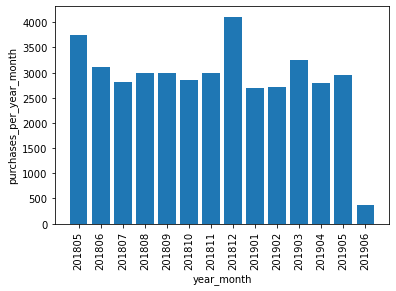

In [272]:
# purchases per year-month

purchases['year'] = purchases['date'].dt.year

# create a numeric field "year-month" and convert it to string format
purchases['year_month'] = purchases['year'] * 100 + purchases['month']
purchases['year_month'] = purchases['year_month'].apply(str)

purchases_per_year_month = purchases[['year_month', 'total_price']].groupby(['year_month']).count()
purchases_per_year_month.sort_index()
x = purchases_per_year_month.index.to_list()
y = purchases_per_year_month.total_price

fig, ax = plt.subplots()
ax.bar(x, y)
ax.set_xlabel('year_month')
ax.set_ylabel('purchases_per_year_month')
plt.xticks(rotation=90)
plt.show()

In [273]:
purchases_per_year_month = purchases.groupby(['year_month']).agg({'total_price': 'count', 'date': pd.Series.nunique})
purchases_per_year_month
# field 'total_price' is count of purchases
# field 'date' is count of days with purchases

,total_price,date
year_month,,
201805,3756,26
201806,3102,28
201807,2817,28
201808,3000,30
201809,2987,29
201810,2863,30
201811,2991,28
201812,4114,30
201901,2688,28


#### Answer:
We see that the sample includes data for May 2018 (26 days) and for May 2019 (29 days).
The rest of the months were included in the sample only once, except for June, which was included in the sample for 2018 (28 days) and for 2019 (only 3 days).  
Therefore, when aggregating purchases by months, we see an almost twofold predominance of purchases in May.

### Problem 8 (quiz)
We see that people go to shop more often in December. But do they spend more per each visit? Let us draw a bar plot that shows the average purchase total price per month of year. Use `groupby` with the `month` variable you (hopefully) created earlier.

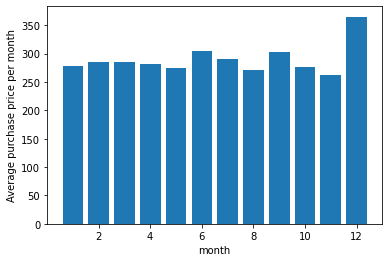

In [274]:
# your code here

purchases_mean_month = purchases[['month', 'total_price']].groupby(['month']).mean()
purchases_mean_month.sort_index()

x = purchases_mean_month.index.to_list()
y = purchases_mean_month.total_price

fig, ax = plt.subplots()
ax.bar(x, y)
ax.set_xlabel('month')
ax.set_ylabel('Average purchase price per month')
plt.show()

### Problem 9 (quiz)
Okay, we see that there is a difference between December's mean purchase price and other month's. But we also see that the average price is different in different months (not including December), probably due to some random factors. Is it possible that December behaviour is just a result of fluke? To answer this question, let us compare two months, for example, December and November, in a statistically rigorous way.

To do so, let us find the average purchase price in each month in each shop (hint: use `.pivot_table`), then extract two samples: one contains average purchase prices in December and another in November. The number of elements in each sample should be equal to the number of shops. Is it true that they are different? Use the statistical test that suits this problem the best with a two-sided alternative. Then answer the question in a quiz.


In [275]:
# your code here

purchases_per_shop = pd.DataFrame(pd.pivot_table(purchases,
                                    values='total_price',
                                    index=['month', 'shop_id'],
                                    aggfunc=np.mean).to_records())

purchases_november = purchases_per_shop[purchases_per_shop['month'] == 11]
purchases_december = purchases_per_shop[purchases_per_shop['month'] == 12]

In [276]:
purchases_november

,month,shop_id,total_price
750,11,0,229.031047
751,11,1,273.595408
752,11,2,224.476430
753,11,3,219.825518
754,11,4,205.284412
...,...,...,...
820,11,70,202.900924
821,11,71,376.025772
822,11,72,247.884335
823,11,73,198.580037


In [277]:
purchases_december

,month,shop_id,total_price
825,12,0,243.490975
826,12,1,307.988105
827,12,2,377.453485
828,12,3,250.578623
829,12,4,216.818569
...,...,...,...
895,12,70,392.298768
896,12,71,529.627675
897,12,72,305.593160
898,12,73,299.018209


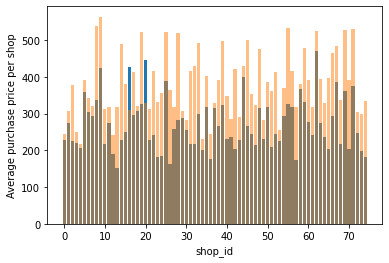

In [278]:
x_november = purchases_november['shop_id']
y_november = purchases_november['total_price']

x_december = purchases_december['shop_id']
y_december = purchases_december['total_price']

fig, ax = plt.subplots()
ax.bar(x_november, y_november, alpha = 1)
ax.bar(x_december, y_december, alpha = 0.5)

ax.set_xlabel('shop_id')
ax.set_ylabel('Average purchase price per shop')
plt.show()

In [280]:
purchases_hypothesis = pd.merge(purchases_november, purchases_december, on='shop_id')

In [281]:
purchases_hypothesis[:5]

,month_x,shop_id,total_price_x,month_y,total_price_y
0,11,0,229.031047,12,243.490975
1,11,1,273.595408,12,307.988105
2,11,2,224.476430,12,377.453485
3,11,3,219.825518,12,250.578623
4,11,4,205.284412,12,216.818569


In [282]:
purchases_hypothesis['difference'] = purchases_hypothesis['total_price_y'] - purchases_hypothesis['total_price_x']

In [283]:
purchases_hypothesis[:5]

,month_x,shop_id,total_price_x,month_y,total_price_y,difference
0,11,0,229.031047,12,243.490975,14.459928
1,11,1,273.595408,12,307.988105,34.392697
2,11,2,224.476430,12,377.453485,152.977054
3,11,3,219.825518,12,250.578623,30.753105
4,11,4,205.284412,12,216.818569,11.534157


In [284]:
t_statistics, p_value = scipy.stats.ttest_1samp(purchases_hypothesis['difference'], 0)

In [287]:
print('t_statistics:', round(t_statistics))
print('p_value:', p_value)
print('(p_value < 0.05) is', p_value < 0.05)

t_statistics: 12.0
p_value: 2.887511793692427e-19
(p_value < 0.05) is True


#### Answer:
The null hypothesis is rejected

### Problem 10 (autograded)

Now let us investigate customer behaviour. First of all we are interested in the relation between customers' age and their spendings per each purchase. To study this relation, first join tables `purchases` and `customers` in such a way to obtain information on customer's age for each purchase. Call the resulting table `purchases_c`. This table should contain all purchases by the registered customers, but rows that correspond to unregistered customers (not present in `customers`) should be dropped. The resulting table also should contain column `customer_id`.

In [288]:
# your code here

purchases_c = pd.merge(purchases[purchases['customer_id'].notna()],
                               customers, left_on='customer_id',
                               right_on='customer id')
purchases_c.drop('customer id', axis = 1, inplace = True)

In [289]:
purchases_c[:5]

,customer_id,date,shop_id,total_price,month,year,year_month,age
0,0.0,2018-05-04,40,289.673291,5,2018,201805,38.0
1,0.0,2019-01-26,40,1316.898901,1,2019,201901,38.0
2,0.0,2018-11-18,42,159.414367,11,2018,201811,38.0
3,0.0,2018-05-12,42,808.791649,5,2018,201805,38.0
4,0.0,2019-04-20,42,1207.855038,4,2019,201904,38.0


In [290]:
assert (
    purchases_c[lambda x: x["customer_id"] == 123]["age"]
    == customers.set_index("customer id").loc[123]["age"]
).all()
assert (
    purchases_c[lambda x: x["customer_id"] == 12]["age"]
    == customers.set_index("customer id").loc[12]["age"]
).all()
assert sum(purchases_c["customer_id"]) == 17548008.0

### Problem 11 (autograded)

In [291]:
purchases_c

,customer_id,date,shop_id,total_price,month,year,year_month,age
0,0.0,2018-05-04,40,289.673291,5,2018,201805,38.0
1,0.0,2019-01-26,40,1316.898901,1,2019,201901,38.0
2,0.0,2018-11-18,42,159.414367,11,2018,201811,38.0
3,0.0,2018-05-12,42,808.791649,5,2018,201805,38.0
4,0.0,2019-04-20,42,1207.855038,4,2019,201904,38.0
...,...,...,...,...,...,...,...,...
28794,1212.0,2018-11-08,60,46.653544,11,2018,201811,24.0
28795,1212.0,2018-07-20,60,50.592132,7,2018,201807,24.0
28796,1212.0,2019-04-18,15,95.459705,4,2019,201904,24.0
28797,1212.0,2019-02-14,60,69.968788,2,2019,201902,24.0


To visualize the relation between customer's age and their spendings, we have to transform our table in such a way that one observation (row) corresponds to one customer. Let us do it by groupping and aggregating. Transform table `purchases_c` to find average `total_price` for each customer and keep column `age`. Indexes of the new dataframe should be customer id's. Put the resulting dataframe to variable `purchases_c_mean`.


In [292]:
# your code here

purchases_c_mean = pd.pivot_table(purchases_c,
                                 values='total_price',
                                 index=['customer_id', 'age'],
                                 aggfunc=np.mean)

purchases_c_mean.reset_index(inplace=True)
purchases_c_mean.index = purchases_c_mean['customer_id']
purchases_c_mean.drop('customer_id', axis=1, inplace=True)

In [293]:
assert (
    purchases_c_mean.loc[12]["total_price"]
    == purchases_c.query("customer_id == 12")["total_price"].mean()
)
assert (
    purchases_c_mean.loc[125]["total_price"]
    == purchases_c.query("customer_id == 125")["total_price"].mean()
)

In [294]:
purchases_c_mean[:5]

,age,total_price
customer_id,,
0.0,38.0,711.291471
2.0,60.0,380.286822
4.0,24.0,349.189551
5.0,24.0,472.189806


### Problem 12 (quiz)
Use dataframe `purchases_c_mean` to visualize the relation between customer's `age` (horizontal axis) and their average `total_price` (vertical axis).

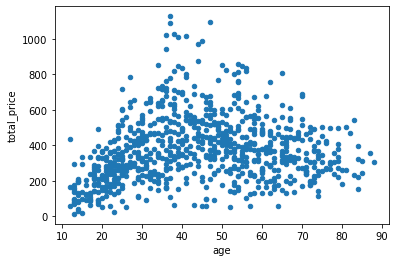

In [295]:
# your code here
purchases_c_mean.plot.scatter(x='age', y='total_price');

### Problem 13 (quiz)
Find Pearson's correlation coefficient between age and total price.

In [296]:
# your code here
purchases_c_mean.corr()

,age,total_price
age,1.000000,0.165395
total_price,0.165395,1.000000


In [297]:
print("Pearson's correlation =", round(purchases_c_mean.corr()['total_price'][0], 2))

Pearson's correlation = 0.17


### Problem 14 (quiz)
We found correlation in the data present on the previous step and made some conclusions based on this data. However, we have to make sure that we can generalize our conclusion to the corresponding population. To do it, let us perform a statistical test of the significance of correlation. This can be done with `scipy.stats.pearsonr`. However, our data contains `NaN`'s in column `age` (there are registered customers with unknown age). Use method `.dropna()` to remove such rows from the dataset, then perform statistical testing with `pearsonr`. This function returns a two-tuple: first value is correlation coefficient and the second is p-value that corresponds to a test where the null hypothesis is that the correlation in population is zero.

In [298]:
# your code here

purchases_c_mean_dropna = purchases_c_mean.dropna()
correlation, p_value_correlation = scipy.stats.pearsonr(purchases_c_mean_dropna['age'],
                                                        purchases_c_mean_dropna['total_price'])
print("Pearson's correlation =", correlation)
print("p_value_correlation =", p_value_correlation)
print('(p_value_correlation < 0.05) is', p_value_correlation < 0.05)

Pearson's correlation = 0.165395081207719
p_value_correlation = 1.811078910330637e-06
(p_value_correlation < 0.05) is True


#### Answer:
The null hypothesis is rejected.  
Pearson's correlation is not zero.

### Problem 15 (autograded)
Now we are going to do the main investigation. We want to understand how special offers in our shops affect customers' behaviour. To do it, we have to identify those purchases that are made during special offers. This can be a bit tricky: for each purchase we know its date and shop id. For each shop we also know the dates of all special offers (there can be several). So for each purchase we have to compare its date with dates of all offers that took place in the corresponding shop.

As a first step, let us try to join `purchases_c` with `shops`. Name this table `full_df_preliminary`.

In [299]:
purchases_c[:3]

,customer_id,date,shop_id,total_price,month,year,year_month,age
0,0.0,2018-05-04,40,289.673291,5,2018,201805,38.0
1,0.0,2019-01-26,40,1316.898901,1,2019,201901,38.0
2,0.0,2018-11-18,42,159.414367,11,2018,201811,38.0


In [300]:
shops[:3]

,shop_id,offer_begin,offer_end
0,0,2019-02-28,2019-03-13
1,0,2018-07-22,2018-08-10
2,0,2018-09-21,2018-09-27


In [301]:
# your code here

full_df_preliminary = pd.merge(purchases_c, shops, left_on='shop_id', right_on='shop_id')

full_df_preliminary[:5]

,customer_id,date,shop_id,total_price,month,year,year_month,age,offer_begin,offer_end
0,0.0,2018-05-04,40,289.673291,5,2018,201805,38.0,2018-08-15,2018-09-10
1,0.0,2019-01-26,40,1316.898901,1,2019,201901,38.0,2018-08-15,2018-09-10
2,0.0,2019-06-01,40,341.922336,6,2019,201906,38.0,2018-08-15,2018-09-10
3,0.0,2018-12-22,40,936.012095,12,2018,201812,38.0,2018-08-15,2018-09-10
4,0.0,2018-06-24,40,1005.693540,6,2018,201806,38.0,2018-08-15,2018-09-10


In [302]:
assert (
    full_df_preliminary.query('date == "2019-04-24" and customer_id == 555.0')[
        "offer_begin"
    ].iloc[0]
    == "2018-08-15"
)
assert (
    full_df_preliminary.query('date == "2018-08-24" and customer_id == 686.0').max()[
        "offer_end"
    ]
    == "2019-01-21"
)

### Problem 16 (autograded)
Let us investigate the table `full_df_preliminary`. Each row of this table corresponds to some purchase. However, for some shops we have several special offers and therefore several rows in the table `shops`. During the join each purchase is joined to all rows of `shops` that correspond to a particular shop. Therefore, purchases are duplicated, and we lost information on which rows in `full_df_preliminary` correspond to which purchase. (For example, the last two rows seem to correspond to the same purchase, but can we be sure?) This is due to the fact that table `purchases_c` don't have any explicit column with purchase identifier. Let us add it. As each row of `purchases_c` corresponds to exactly one purchase, table index can work as such an identifier. To create a column that coincides with the index one can use method `.reset_index()`.

Apply `.reset_index()` to `purchases_c`, then repeat the join from the previous problem. Name the resulting dataframe `full_df`.

In [303]:
# your code here

purchases_c.reset_index(inplace=True)
full_df = pd.merge(purchases_c, shops, left_on='shop_id', right_on='shop_id')

full_df [:5]

,index,customer_id,date,shop_id,total_price,month,year,year_month,age,offer_begin,offer_end
0,0,0.0,2018-05-04,40,289.673291,5,2018,201805,38.0,2018-08-15,2018-09-10
1,1,0.0,2019-01-26,40,1316.898901,1,2019,201901,38.0,2018-08-15,2018-09-10
2,7,0.0,2019-06-01,40,341.922336,6,2019,201906,38.0,2018-08-15,2018-09-10
3,9,0.0,2018-12-22,40,936.012095,12,2018,201812,38.0,2018-08-15,2018-09-10
4,10,0.0,2018-06-24,40,1005.693540,6,2018,201806,38.0,2018-08-15,2018-09-10


In [304]:
assert (
    full_df.query("index == 1207")
    .iloc[0][["customer_id", "date", "shop_id", "total_price"]]
    .equals(purchases_c.loc[1207][["customer_id", "date", "shop_id", "total_price"]])
)

### Problem 17 (autograded)
Now we need to check for each purchase, did it happen during any of the special offers or not. In the dataset `full_df`, each row relates some purchase with some special offer that happened in the same shop as a purchase. Let us check, is it true that this purchase happened during the corresponding offer? Add a column `offer` that contains values `True` or `False` that answer this question. To do so, we have to compare the value in column `date` with values in columns `offer_begin` and `offer_end`. Let us assume that `offer_end` is the last day of the offer (so the offer still holds during this day). Name the corresponding dataframe `full_df_offer`. Note that you can compare between dates, but not between dates and strings. Convert your data appropriately.


In [305]:
# your code here

full_df_offer = full_df.copy()
full_df_offer['offer_begin'] = pd.to_datetime(full_df_offer['offer_begin'])
full_df_offer['offer_end'] = pd.to_datetime(full_df_offer['offer_end'])

full_df_offer['offer'] = (full_df_offer['date'] >= full_df_offer['offer_begin']) & (full_df_offer['date'] <= full_df_offer['offer_end'])


In [306]:
full_df_offer[:5]

,index,customer_id,date,shop_id,total_price,month,year,year_month,age,offer_begin,offer_end,offer
0,0,0.0,2018-05-04,40,289.673291,5,2018,201805,38.0,2018-08-15,2018-09-10,False
1,1,0.0,2019-01-26,40,1316.898901,1,2019,201901,38.0,2018-08-15,2018-09-10,False
2,7,0.0,2019-06-01,40,341.922336,6,2019,201906,38.0,2018-08-15,2018-09-10,False
3,9,0.0,2018-12-22,40,936.012095,12,2018,201812,38.0,2018-08-15,2018-09-10,False
4,10,0.0,2018-06-24,40,1005.693540,6,2018,201806,38.0,2018-08-15,2018-09-10,False


In [307]:
from itertools import islice

for _, row in islice(full_df_offer.iterrows(), 0, 1000):
    assert (
        (pd.to_datetime(row["date"]) >= pd.to_datetime(row["offer_begin"]))
        & (pd.to_datetime(row["date"]) <= pd.to_datetime(row["offer_end"]))
    ) == row["offer"]

### Almost here
Now we have a table that contains information on whether a particular purchase happened during a particular special offer. What we need is a new table that contains information on whether a particular purchase happened during *any* relevant special offer. This can be done by grouping and aggregating. Basically, we need to group our table by column `index` that contains a purchase identifier and apply a special aggregation function `any` to column `offer`. This function checks if there is any `True` element in a group and returns `True` in this case, otherwise (everything is `False`) it returns false. Also, we have to keep all other columns that are related to purchases as is. They are duplicated in the group, so we can just get the first value. This is done by the aggregation function `first`. To apply these functions to different columns, we have to pass a dictionary to method `.agg`. Let's see what's happening.


In [308]:
purchases_offer = full_df_offer.groupby("index").agg(
    {
        "customer_id": "first",
        "date": "first",
        "shop_id": "first",
        "total_price": "first",
        "month": "first",
        "age": "first",
        "offer": "any",
    }
)
purchases_offer

,customer_id,date,shop_id,total_price,month,age,offer
index,,,,,,,
0,0.0,2018-05-04,40,289.673291,5,38.0,False
1,0.0,2019-01-26,40,1316.898901,1,38.0,False
2,0.0,2018-11-18,42,159.414367,11,38.0,False
3,0.0,2018-05-12,42,808.791649,5,38.0,False
4,0.0,2019-04-20,42,1207.855038,4,38.0,False
...,...,...,...,...,...,...,...
28794,1212.0,2018-11-08,60,46.653544,11,24.0,False
28795,1212.0,2018-07-20,60,50.592132,7,24.0,True
28796,1212.0,2019-04-18,15,95.459705,4,24.0,False


### Problem 18 (quiz)
Do people tend to spend more money when they make a purchase during a special offer? Let's check it!

First of all, we know that during December people spend more money in shops due to holidays and at the time shops usually announce more special offers during December. As we are interested in the effect of special offers alone, let us remove all purchases that happened during December.

Then create a table which rows are customers that contains two columns: in one column we have average of all prices of purchases that were made during special offers, and in the second the same for purchases that were not made during special offers. Drop all rows that contain `NaN`'s. Then apply an appropriate statistical test to check if there is any statistically significant difference between these columns. Use two-sided alternative.




In [309]:
# your code here

purchases_offer_wo_outlier = purchases_offer[purchases_offer['month'] != 12]
purchases_offer_mean_hyp = pd.pivot_table(purchases_offer_wo_outlier,
                                          values='total_price',
                                          index=['customer_id'],
                                          columns='offer',
                                          aggfunc=np.mean)
purchases_offer_mean_hyp.dropna(inplace=True)
purchases_offer_mean_hyp = pd.DataFrame(purchases_offer_mean_hyp.to_records())
purchases_offer_mean_hyp['difference'] = purchases_offer_mean_hyp['True'] - purchases_offer_mean_hyp['False']

t_statistics_offer, p_value_offer = scipy.stats.ttest_1samp(purchases_offer_mean_hyp['difference'], 0)


print("t_statistics =", round(t_statistics_offer))
print("p_value =", p_value_correlation)
print("(p_value < 0.05) is", p_value_correlation < 0.05)

t_statistics = 17.0
p_value = 1.811078910330637e-06
(p_value < 0.05) is True
